**Goal of the Code:**
Create three plots, one for each T$_{mean}$, T$_{Xx}$ and T$_{Nn}$. Plotted is the 21-year running mean of each variable of the land region north of 50°N (y-axis) against the 21-year running mean of the global mean temperature T$_{glob}$ (x-axis) for all scenarios (RCP8.5, RCP4.5 CCT, MSB and SAI). These plots help to understand how T$_{mean}$, T$_{Xx}$ and T$_{Nn}$ on land change in relation to mean temperature for each scenario and how the scenarios differ from each other.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import iris
import iris.coord_categorisation
import matplotlib
import iris.analysis.cartography

Define function to calculate running mean of a time series where x = array and w = time span of running mean.

In [2]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

Load the TREFMXAV, TREFMNAV, TSA and TS files. The region 74:96 represents everything North of 50°N. CCT03 starts 12 months after the other ensembles, hence why they start at 12. TREFMXAV = T$_{Xx}$, TSA = T$_{mean}$, TREMNAV = T$_{Nn}$. 

In [3]:
path = r"E:\Datasets_Geoengineering\JS_files_new_sel_var/"

CCT_Tmean_01 = iris.load(path + r"TSA_01_sel_var_CCT.all.nc")[0][12:,74:96,:]
CCT_Tmean_02 = iris.load(path + r"TSA_02_sel_var_CCT.all.nc")[0][12:,74:96,:]
CCT_Tmean_03 = iris.load(path + r"TSA_03_sel_var_CCT.all.nc")[0][:,74:96,:]

MSB_Tmean_01 = iris.load(path + r"TSA_01_sel_var_MSB.all.nc")[0][:,74:96,:]
MSB_Tmean_02 = iris.load(path + r"TSA_02_sel_var_MSB.all.nc")[0][:,74:96,:]
MSB_Tmean_03 = iris.load(path + r"TSA_03_sel_var_MSB.all.nc")[0][:,74:96,:]

SAI_Tmean_01 = iris.load(path + r"TSA_01_sel_var_SAI.all.nc")[0][:,74:96,:]
SAI_Tmean_02 = iris.load(path + r"TSA_02_sel_var_SAI.all.nc")[0][:,74:96,:]
SAI_Tmean_03 = iris.load(path + r"TSA_03_sel_var_SAI.all.nc")[0][:,74:96,:]

RCP_Tmean_01 = iris.load(r"E:\Datasets_Geoengineering\JS_files_RCP_85\TSA_sel_var_RCP85.all.nc")[0][:,74:96,:]
RCP45_Tmean_01 = iris.load(r"E:\Datasets_Geoengineering\RCP45_variables\TSA_RCP45.all.nc")[0][:,74:96,:]


CCT_TXx_01 = iris.load(path + r"TREFMXAV_01_sel_var_CCT.all.nc")[0][12:,74:96,:]
CCT_TXx_02 = iris.load(path + r"TREFMXAV_02_sel_var_CCT.all.nc")[0][12:,74:96,:]
CCT_TXx_03 = iris.load(path + r"TREFMXAV_03_sel_var_CCT.all.nc")[0][:,74:96,:]

MSB_TXx_01 = iris.load(path + r"TREFMXAV_01_sel_var_MSB.all.nc")[0][:,74:96,:]
MSB_TXx_02 = iris.load(path + r"TREFMXAV_02_sel_var_MSB.all.nc")[0][:,74:96,:]
MSB_TXx_03 = iris.load(path + r"TREFMXAV_03_sel_var_MSB.all.nc")[0][:,74:96,:]

SAI_TXx_01 = iris.load(path + r"TREFMXAV_01_sel_var_SAI.all.nc")[0][:,74:96,:]
SAI_TXx_02 = iris.load(path + r"TREFMXAV_02_sel_var_SAI.all.nc")[0][:,74:96,:]
SAI_TXx_03 = iris.load(path + r"TREFMXAV_03_sel_var_SAI.all.nc")[0][:,74:96,:]

RCP_TXx_01 = iris.load(r"E:\Datasets_Geoengineering\JS_files_RCP_85\TREFMXAV_sel_var_RCP85.all.nc")[0][:,74:96,:]
RCP45_TXx_01 = iris.load(r"E:\Datasets_Geoengineering\RCP45_variables\TREFMXAV_RCP45.all.nc")[0][:,74:96,:]



CCT_TNn_01 = iris.load(path + r"TREFMNAV_01_sel_var_CCT.all.nc")[0][12:,74:96,:]
CCT_TNn_02 = iris.load(path + r"TREFMNAV_02_sel_var_CCT.all.nc")[0][12:,74:96,:]
CCT_TNn_03 = iris.load(path + r"TREFMNAV_03_sel_var_CCT.all.nc")[0][:,74:96,:]

MSB_TNn_01 = iris.load(path + r"TREFMNAV_01_sel_var_MSB.all.nc")[0][:,74:96,:]
MSB_TNn_02 = iris.load(path + r"TREFMNAV_02_sel_var_MSB.all.nc")[0][:,74:96,:]
MSB_TNn_03 = iris.load(path + r"TREFMNAV_03_sel_var_MSB.all.nc")[0][:,74:96,:]

SAI_TNn_01 = iris.load(path + r"TREFMNAV_01_sel_var_SAI.all.nc")[0][:,74:96,:]
SAI_TNn_02 = iris.load(path + r"TREFMNAV_02_sel_var_SAI.all.nc")[0][:,74:96,:]
SAI_TNn_03 = iris.load(path + r"TREFMNAV_03_sel_var_SAI.all.nc")[0][:,74:96,:]

RCP_TNn_01 = iris.load(r"E:\Datasets_Geoengineering\JS_files_RCP_85\TREFMNAV_sel_var_RCP85.all.nc")[0][:,74:96,:]
RCP45_TNn_01 = iris.load(r"E:\Datasets_Geoengineering\RCP45_variables\TREFMNAV_RCP45.all.nc")[0][:,74:96,:]


CCT_Ref_01 = iris.load(path + r"TS_01_sel_var_CCT_cam.all.nc")[0][12:,:,:]
CCT_Ref_02 = iris.load(path + r"TS_02_sel_var_CCT_cam.all.nc")[0][12:,:,:]
CCT_Ref_03 = iris.load(path + r"TS_03_sel_var_CCT_cam.all.nc")[0][:,:,:]

MSB_Ref_01 = iris.load(path + r"TS_01_sel_var_MSB_cam.all.nc")[0][:,:,:]
MSB_Ref_02 = iris.load(path + r"TS_02_sel_var_MSB_cam.all.nc")[0][:,:,:]
MSB_Ref_03 = iris.load(path + r"TS_03_sel_var_MSB_cam.all.nc")[0][:,:,:]

SAI_Ref_01 = iris.load(path + r"TS_01_sel_var_SAI_cam.all.nc")[0][:,:,:]
SAI_Ref_02 = iris.load(path + r"TS_02_sel_var_SAI_cam.all.nc")[0][:,:,:]
SAI_Ref_03 = iris.load(path + r"TS_03_sel_var_SAI_cam.all.nc")[0][:,:,:]

RCP_Ref = iris.load(r"E:\Datasets_Geoengineering\JS_files_RCP_85\TS_sel_var_RCP85_cam.all.nc")[0][:,:,:]
RCP45_Ref = iris.load(r"E:\Datasets_Geoengineering\RCP45_variables\TS_RCP45_cam.all.nc")[0][:,:,:]

Create a cosine weighted mean of the loaded area for each dataset.

In [4]:
import warnings
warnings.filterwarnings("ignore") ## To ignore UserWarning about collapsing a non-contagious variable

## TXx
CCT_01_weigh = iris.analysis.cartography.cosine_latitude_weights(CCT_TXx_01)
CCT_TXx_01_weigh_mean = CCT_TXx_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = CCT_01_weigh).data 
CCT_02_weigh = iris.analysis.cartography.cosine_latitude_weights(CCT_TXx_02)
CCT_TXx_02_weigh_mean = CCT_TXx_02.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = CCT_02_weigh).data
CCT_03_weigh = iris.analysis.cartography.cosine_latitude_weights(CCT_TXx_03)
CCT_TXx_03_weigh_mean = CCT_TXx_03.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = CCT_03_weigh).data

MSB_01_weigh = iris.analysis.cartography.cosine_latitude_weights(MSB_TXx_01)
MSB_TXx_01_weigh_mean = MSB_TXx_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = MSB_01_weigh).data 
MSB_02_weigh = iris.analysis.cartography.cosine_latitude_weights(MSB_TXx_02)
MSB_TXx_02_weigh_mean = MSB_TXx_02.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = MSB_02_weigh).data 
MSB_03_weigh = iris.analysis.cartography.cosine_latitude_weights(MSB_TXx_03)
MSB_TXx_03_weigh_mean = MSB_TXx_03.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = MSB_03_weigh).data 

SAI_01_weigh = iris.analysis.cartography.cosine_latitude_weights(SAI_TXx_01)
SAI_TXx_01_weigh_mean = SAI_TXx_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = SAI_01_weigh).data 
SAI_02_weigh = iris.analysis.cartography.cosine_latitude_weights(SAI_TXx_02)
SAI_TXx_02_weigh_mean = SAI_TXx_02.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = SAI_02_weigh).data 
SAI_03_weigh = iris.analysis.cartography.cosine_latitude_weights(SAI_TXx_03)
SAI_TXx_03_weigh_mean = SAI_TXx_03.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = SAI_03_weigh).data 

RCP_01_weigh = iris.analysis.cartography.cosine_latitude_weights(RCP_TXx_01)
RCP_TXx_01_weigh_mean = RCP_TXx_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = RCP_01_weigh).data

RCP45_01_weigh = iris.analysis.cartography.cosine_latitude_weights(RCP45_TXx_01)
RCP45_TXx_01_weigh_mean = RCP45_TXx_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = RCP45_01_weigh).data

## Tmean
CCT_01_weigh = iris.analysis.cartography.cosine_latitude_weights(CCT_Tmean_01)
CCT_Tmean_01_weigh_mean = CCT_Tmean_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = CCT_01_weigh).data 
CCT_02_weigh = iris.analysis.cartography.cosine_latitude_weights(CCT_Tmean_02)
CCT_Tmean_02_weigh_mean = CCT_Tmean_02.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = CCT_02_weigh).data
CCT_03_weigh = iris.analysis.cartography.cosine_latitude_weights(CCT_Tmean_03)
CCT_Tmean_03_weigh_mean = CCT_Tmean_03.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = CCT_03_weigh).data

MSB_01_weigh = iris.analysis.cartography.cosine_latitude_weights(MSB_Tmean_01)
MSB_Tmean_01_weigh_mean = MSB_Tmean_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = MSB_01_weigh).data 
MSB_02_weigh = iris.analysis.cartography.cosine_latitude_weights(MSB_Tmean_02)
MSB_Tmean_02_weigh_mean = MSB_Tmean_02.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = MSB_02_weigh).data
MSB_03_weigh = iris.analysis.cartography.cosine_latitude_weights(MSB_Tmean_03)
MSB_Tmean_03_weigh_mean = MSB_Tmean_03.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = MSB_03_weigh).data

SAI_01_weigh = iris.analysis.cartography.cosine_latitude_weights(SAI_Tmean_01)
SAI_Tmean_01_weigh_mean = SAI_Tmean_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = SAI_01_weigh).data 
SAI_02_weigh = iris.analysis.cartography.cosine_latitude_weights(SAI_Tmean_02)
SAI_Tmean_02_weigh_mean = SAI_Tmean_02.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = SAI_02_weigh).data
SAI_03_weigh = iris.analysis.cartography.cosine_latitude_weights(SAI_Tmean_03)
SAI_Tmean_03_weigh_mean = SAI_Tmean_03.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = SAI_03_weigh).data

RCP_01_weigh = iris.analysis.cartography.cosine_latitude_weights(RCP_Tmean_01)
RCP_Tmean_01_weigh_mean = RCP_Tmean_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = RCP_01_weigh).data

RCP45_01_weigh = iris.analysis.cartography.cosine_latitude_weights(RCP45_Tmean_01)
RCP45_Tmean_01_weigh_mean = RCP45_Tmean_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = RCP45_01_weigh).data

## TNn
CCT_01_weigh = iris.analysis.cartography.cosine_latitude_weights(CCT_TNn_01)
CCT_TNn_01_weigh_mean = CCT_TNn_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = CCT_01_weigh).data 
CCT_02_weigh = iris.analysis.cartography.cosine_latitude_weights(CCT_TNn_02)
CCT_TNn_02_weigh_mean = CCT_TNn_02.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = CCT_02_weigh).data
CCT_03_weigh = iris.analysis.cartography.cosine_latitude_weights(CCT_TNn_03)
CCT_TNn_03_weigh_mean = CCT_TNn_03.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = CCT_03_weigh).data

MSB_01_weigh = iris.analysis.cartography.cosine_latitude_weights(MSB_TNn_01)
MSB_TNn_01_weigh_mean = MSB_TNn_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = MSB_01_weigh).data 
MSB_02_weigh = iris.analysis.cartography.cosine_latitude_weights(MSB_TNn_02)
MSB_TNn_02_weigh_mean = MSB_TNn_02.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = MSB_02_weigh).data 
MSB_03_weigh = iris.analysis.cartography.cosine_latitude_weights(MSB_TNn_03)
MSB_TNn_03_weigh_mean = MSB_TNn_03.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = MSB_03_weigh).data 

SAI_01_weigh = iris.analysis.cartography.cosine_latitude_weights(SAI_TNn_01)
SAI_TNn_01_weigh_mean = SAI_TNn_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = SAI_01_weigh).data 
SAI_02_weigh = iris.analysis.cartography.cosine_latitude_weights(SAI_TNn_02)
SAI_TNn_02_weigh_mean = SAI_TNn_02.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = SAI_02_weigh).data 
SAI_03_weigh = iris.analysis.cartography.cosine_latitude_weights(SAI_TNn_03)
SAI_TNn_03_weigh_mean = SAI_TNn_03.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = SAI_03_weigh).data 

RCP_01_weigh = iris.analysis.cartography.cosine_latitude_weights(RCP_TNn_01)
RCP_TNn_01_weigh_mean = RCP_TNn_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = RCP_01_weigh).data

RCP45_01_weigh = iris.analysis.cartography.cosine_latitude_weights(RCP45_TNn_01)
RCP45_TNn_01_weigh_mean = RCP45_TNn_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = RCP45_01_weigh).data

## Tglob (= land and ocean)
CCT_Ref_01_weigh = iris.analysis.cartography.cosine_latitude_weights(CCT_Ref_01)
CCT_Ref_01_weigh_mean = CCT_Ref_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = CCT_Ref_01_weigh).data 
CCT_Ref_02_weigh = iris.analysis.cartography.cosine_latitude_weights(CCT_Ref_02)
CCT_Ref_02_weigh_mean = CCT_Ref_02.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = CCT_Ref_02_weigh).data 
CCT_Ref_03_weigh = iris.analysis.cartography.cosine_latitude_weights(CCT_Ref_03)
CCT_Ref_03_weigh_mean = CCT_Ref_03.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = CCT_Ref_03_weigh).data 

MSB_Ref_01_weigh = iris.analysis.cartography.cosine_latitude_weights(MSB_Ref_01)
MSB_Ref_01_weigh_mean = MSB_Ref_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = MSB_Ref_01_weigh).data 
MSB_Ref_02_weigh = iris.analysis.cartography.cosine_latitude_weights(MSB_Ref_02)
MSB_Ref_02_weigh_mean = MSB_Ref_02.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = MSB_Ref_02_weigh).data 
MSB_Ref_03_weigh = iris.analysis.cartography.cosine_latitude_weights(MSB_Ref_03)
MSB_Ref_03_weigh_mean = MSB_Ref_03.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = MSB_Ref_03_weigh).data 

SAI_Ref_01_weigh = iris.analysis.cartography.cosine_latitude_weights(SAI_Ref_01)
SAI_Ref_01_weigh_mean = SAI_Ref_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = SAI_Ref_01_weigh).data 
SAI_Ref_02_weigh = iris.analysis.cartography.cosine_latitude_weights(SAI_Ref_02)
SAI_Ref_02_weigh_mean = SAI_Ref_02.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = SAI_Ref_02_weigh).data 
SAI_Ref_03_weigh = iris.analysis.cartography.cosine_latitude_weights(SAI_Ref_03)
SAI_Ref_03_weigh_mean = SAI_Ref_03.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = SAI_Ref_03_weigh).data 

RCP_Ref_weigh = iris.analysis.cartography.cosine_latitude_weights(RCP_Ref)
RCP_Ref_weigh_mean = RCP_Ref.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = RCP_Ref_weigh).data 

RCP45_Ref_weigh = iris.analysis.cartography.cosine_latitude_weights(RCP45_Ref)
RCP45_Ref_weigh_mean = RCP45_Ref.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = RCP45_Ref_weigh).data 


CCT and MSB have a missing month in the second ensembles in all cam datasets. The missing month is at [264] in CCT02 and [531] in MSB02. Hence, for this position, the mean of the other two ensembles is calculated and inserted instead.

In [5]:
## Tmean (not cam)
CCT_Tmean_02_array = (CCT_Tmean_02_weigh_mean.data)
CCT_Tmean_02_list = CCT_Tmean_02_array.tolist()
CCT_Tmean_01_array = CCT_Tmean_01_weigh_mean.data
CCT_Tmean_01_list = CCT_Tmean_01_array.tolist()
CCT_Tmean_03_array = CCT_Tmean_03_weigh_mean.data
CCT_Tmean_03_list = CCT_Tmean_03_array.tolist()

MSB_Tmean_02_array = (MSB_Tmean_02_weigh_mean.data)
MSB_Tmean_02_list = MSB_Tmean_02_array.tolist()
MSB_Tmean_01_array = MSB_Tmean_01_weigh_mean.data
MSB_Tmean_01_list = MSB_Tmean_01_array.tolist()
MSB_Tmean_03_array = MSB_Tmean_03_weigh_mean.data
MSB_Tmean_03_list = MSB_Tmean_03_array.tolist()

## Tglob (cam)
CCT_Ref_02_array = (CCT_Ref_02_weigh_mean.data)
CCT_Ref_02_list = CCT_Ref_02_array.tolist()
CCT_Ref_02_list.insert(264-12, (CCT_Ref_01_weigh_mean[264-12] + CCT_Ref_03_weigh_mean[264-12]) / 2) ## 264 - 12 since we start CCT02 from 12 and not from 0
CCT_Ref_01_array = CCT_Ref_01_weigh_mean.data
CCT_Ref_01_list = CCT_Ref_01_array.tolist()
CCT_Ref_03_array = CCT_Ref_03_weigh_mean.data
CCT_Ref_03_list = CCT_Ref_03_array.tolist()

MSB_Ref_02_array = (MSB_Ref_02_weigh_mean.data)
MSB_Ref_02_list = MSB_Ref_02_array.tolist()
MSB_Ref_02_list.insert(531, (MSB_Ref_01_weigh_mean[531] + MSB_Ref_03_weigh_mean[531]) / 2)
MSB_Ref_01_array = MSB_Ref_01_weigh_mean.data
MSB_Ref_01_list = MSB_Ref_01_array.tolist()
MSB_Ref_03_array = MSB_Ref_03_weigh_mean.data
MSB_Ref_03_list = MSB_Ref_03_array.tolist()

Calculate the yearly maximum for the TREFMXAV datasets and the yearly mean for the TSA datasets. CCT has 960 months, SAI and MSB 972 months and RCP8.5&RCP4.5 1140 months.

In [6]:
CCT_01_year_max = []
CCT_02_year_max = []
CCT_03_year_max = []
CCT_01_year_min = []
CCT_02_year_min = []
CCT_03_year_min = []
CCT_01_year_mean = []
CCT_02_year_mean = []
CCT_03_year_mean = []
CCT_01_year_Ref = []
CCT_02_year_Ref = []
CCT_03_year_Ref = []

i = 0
while i in range(0,960):
    CCT_01_year_max.append(max(CCT_TXx_01_weigh_mean[i:i+12].data))
    CCT_02_year_max.append(max(CCT_TXx_02_weigh_mean[i:i+12].data))
    CCT_03_year_max.append(max(CCT_TXx_03_weigh_mean[i:i+12].data))
    
    CCT_01_year_mean.append(np.mean(CCT_Tmean_01_list[i:i+12]))
    CCT_02_year_mean.append(np.mean(CCT_Tmean_02_list[i:i+12]))
    CCT_03_year_mean.append(np.mean(CCT_Tmean_03_list[i:i+12]))
    
    CCT_01_year_min.append(min(CCT_TNn_01_weigh_mean[i:i+12].data))
    CCT_02_year_min.append(min(CCT_TNn_02_weigh_mean[i:i+12].data))
    CCT_03_year_min.append(min(CCT_TNn_03_weigh_mean[i:i+12].data))
    
    CCT_01_year_Ref.append(np.mean(CCT_Ref_01_list[i:i+12]))
    CCT_02_year_Ref.append(np.mean(CCT_Ref_02_list[i:i+12]))
    CCT_03_year_Ref.append(np.mean(CCT_Ref_03_list[i:i+12]))
    i = i + 12
    
MSB_01_year_max = []
MSB_02_year_max = []
MSB_03_year_max = []
SAI_01_year_max = []
SAI_02_year_max = []
SAI_03_year_max = []
MSB_01_year_mean = []
MSB_02_year_mean = []
MSB_03_year_mean = []
SAI_01_year_mean = []
SAI_02_year_mean = []
SAI_03_year_mean = []
MSB_01_year_min = []
MSB_02_year_min = []
MSB_03_year_min = []
SAI_01_year_min = []
SAI_02_year_min = []
SAI_03_year_min = []
MSB_01_year_Ref = []
MSB_02_year_Ref = []
MSB_03_year_Ref = []
SAI_01_year_Ref = []
SAI_02_year_Ref = []
SAI_03_year_Ref = []

i = 0
while i in range(0,972):
    MSB_01_year_max.append(max(MSB_TXx_01_weigh_mean[i:i+12].data))
    MSB_02_year_max.append(max(MSB_TXx_02_weigh_mean[i:i+12].data))
    MSB_03_year_max.append(max(MSB_TXx_03_weigh_mean[i:i+12].data))
    SAI_01_year_max.append(max(SAI_TXx_01_weigh_mean[i:i+12].data))
    SAI_02_year_max.append(max(SAI_TXx_02_weigh_mean[i:i+12].data))
    SAI_03_year_max.append(max(SAI_TXx_03_weigh_mean[i:i+12].data))
    
    MSB_01_year_mean.append(np.mean(MSB_Tmean_01_list[i:i+12]))
    MSB_02_year_mean.append(np.mean(MSB_Tmean_02_list[i:i+12]))
    MSB_03_year_mean.append(np.mean(MSB_Tmean_03_list[i:i+12]))
    SAI_01_year_mean.append(np.mean(SAI_Tmean_01_weigh_mean[i:i+12].data))
    SAI_02_year_mean.append(np.mean(SAI_Tmean_01_weigh_mean[i:i+12].data))
    SAI_03_year_mean.append(np.mean(SAI_Tmean_01_weigh_mean[i:i+12].data))
    
    MSB_01_year_min.append(min(MSB_TNn_01_weigh_mean[i:i+12].data))
    MSB_02_year_min.append(min(MSB_TNn_02_weigh_mean[i:i+12].data))
    MSB_03_year_min.append(min(MSB_TNn_03_weigh_mean[i:i+12].data))
    SAI_01_year_min.append(min(SAI_TNn_01_weigh_mean[i:i+12].data))
    SAI_02_year_min.append(min(SAI_TNn_02_weigh_mean[i:i+12].data))
    SAI_03_year_min.append(min(SAI_TNn_03_weigh_mean[i:i+12].data))
    
    MSB_01_year_Ref.append(np.mean(MSB_Ref_01_list[i:i+12]))
    MSB_02_year_Ref.append(np.mean(MSB_Ref_02_list[i:i+12]))
    MSB_03_year_Ref.append(np.mean(MSB_Ref_03_list[i:i+12]))
    SAI_01_year_Ref.append(np.mean(SAI_Ref_01_weigh_mean[i:i+12].data))
    SAI_02_year_Ref.append(np.mean(SAI_Ref_01_weigh_mean[i:i+12].data))
    SAI_03_year_Ref.append(np.mean(SAI_Ref_01_weigh_mean[i:i+12].data))
    i = i + 12

RCP_01_year_max = []
RCP_01_year_Ref = []
RCP_01_year_mean = []
RCP_01_year_min = []

i = 0
while i in range(0,1140):
    RCP_01_year_max.append(max(RCP_TXx_01_weigh_mean[i:i+12].data))
    RCP_01_year_mean.append(np.mean(RCP_Tmean_01_weigh_mean[i:i+12].data))
    RCP_01_year_min.append(min(RCP_TNn_01_weigh_mean[i:i+12].data))
    RCP_01_year_Ref.append(np.mean(RCP_Ref_weigh_mean[i:i+12].data))
    i = i + 12
    
RCP45_01_year_max = []
RCP45_01_year_Ref = []
RCP45_01_year_mean = []
RCP45_01_year_min = []

i = 0
while i in range(0,1140):
    RCP45_01_year_max.append(max(RCP45_TXx_01_weigh_mean[i:i+12].data))
    RCP45_01_year_mean.append(np.mean(RCP45_Tmean_01_weigh_mean[i:i+12].data))
    RCP45_01_year_min.append(min(RCP45_TNn_01_weigh_mean[i:i+12].data))
    RCP45_01_year_Ref.append(np.mean(RCP45_Ref_weigh_mean[i:i+12].data))
    i = i + 12

Calculate the 21-year running mean for each dataset.

In [7]:
CCT_TXx_roll_mean_01 = moving_average(CCT_01_year_max, 21)
CCT_TXx_roll_mean_02 = moving_average(CCT_02_year_max, 21)
CCT_TXx_roll_mean_03 = moving_average(CCT_03_year_max, 21)
MSB_TXx_roll_mean_01 = moving_average(MSB_01_year_max, 21)
MSB_TXx_roll_mean_02 = moving_average(MSB_02_year_max, 21)
MSB_TXx_roll_mean_03 = moving_average(MSB_03_year_max, 21)
SAI_TXx_roll_mean_01 = moving_average(SAI_01_year_max, 21)
SAI_TXx_roll_mean_02 = moving_average(SAI_02_year_max, 21)
SAI_TXx_roll_mean_03 = moving_average(SAI_03_year_max, 21)
RCP_TXx_roll_mean = moving_average(RCP_01_year_max, 21)
RCP45_TXx_roll_mean = moving_average(RCP45_01_year_max, 21)


CCT_Tmean_roll_mean_01 = moving_average(CCT_01_year_mean, 21)
CCT_Tmean_roll_mean_02 = moving_average(CCT_02_year_mean, 21)
CCT_Tmean_roll_mean_03 = moving_average(CCT_03_year_mean, 21)
MSB_Tmean_roll_mean_01 = moving_average(MSB_01_year_mean, 21)
MSB_Tmean_roll_mean_02 = moving_average(MSB_02_year_mean, 21)
MSB_Tmean_roll_mean_03 = moving_average(MSB_03_year_mean, 21)
SAI_Tmean_roll_mean_01 = moving_average(SAI_01_year_mean, 21)
SAI_Tmean_roll_mean_02 = moving_average(SAI_02_year_mean, 21)
SAI_Tmean_roll_mean_03 = moving_average(SAI_03_year_mean, 21)
RCP_Tmean_roll_mean = moving_average(RCP_01_year_mean, 21)
RCP45_Tmean_roll_mean = moving_average(RCP45_01_year_mean, 21)


CCT_TNn_roll_mean_01 = moving_average(CCT_01_year_min, 21)
CCT_TNn_roll_mean_02 = moving_average(CCT_02_year_min, 21)
CCT_TNn_roll_mean_03 = moving_average(CCT_03_year_min, 21)
MSB_TNn_roll_mean_01 = moving_average(MSB_01_year_min, 21)
MSB_TNn_roll_mean_02 = moving_average(MSB_02_year_min, 21)
MSB_TNn_roll_mean_03 = moving_average(MSB_03_year_min, 21)
SAI_TNn_roll_mean_01 = moving_average(SAI_01_year_min, 21)
SAI_TNn_roll_mean_02 = moving_average(SAI_02_year_min, 21)
SAI_TNn_roll_mean_03 = moving_average(SAI_03_year_min, 21)
RCP_TNn_roll_mean = moving_average(RCP_01_year_min, 21)
RCP45_TNn_roll_mean = moving_average(RCP45_01_year_min, 21)


CCT_Ref_roll_mean_01 = moving_average(CCT_01_year_Ref, 21)
CCT_Ref_roll_mean_02 = moving_average(CCT_02_year_Ref, 21)
CCT_Ref_roll_mean_03 = moving_average(CCT_03_year_Ref, 21)
MSB_Ref_roll_mean_01 = moving_average(MSB_01_year_Ref, 21)
MSB_Ref_roll_mean_02 = moving_average(MSB_02_year_Ref, 21)
MSB_Ref_roll_mean_03 = moving_average(MSB_03_year_Ref, 21)
SAI_Ref_roll_mean_01 = moving_average(SAI_01_year_Ref, 21)
SAI_Ref_roll_mean_02 = moving_average(SAI_02_year_Ref, 21)
SAI_Ref_roll_mean_03 = moving_average(SAI_03_year_Ref, 21)
RCP_Ref_roll_mean = moving_average(RCP_01_year_Ref, 21)
RCP45_Ref_roll_mean = moving_average(RCP45_01_year_Ref, 21)

Calculate the mean of the three ensembles for CCT, MSB and SAI.

In [8]:
CCT_TXx_mean = (CCT_TXx_roll_mean_01 + CCT_TXx_roll_mean_02 + CCT_TXx_roll_mean_03) / 3
MSB_TXx_mean = (MSB_TXx_roll_mean_01 + MSB_TXx_roll_mean_02 + MSB_TXx_roll_mean_03) / 3
SAI_TXx_mean = (SAI_TXx_roll_mean_01 + SAI_TXx_roll_mean_02 + SAI_TXx_roll_mean_03) / 3

CCT_Tmean_mean = (CCT_Tmean_roll_mean_01 + CCT_Tmean_roll_mean_02 + CCT_Tmean_roll_mean_03) / 3
MSB_Tmean_mean = (MSB_Tmean_roll_mean_01 + MSB_Tmean_roll_mean_02 + MSB_Tmean_roll_mean_03) / 3
SAI_Tmean_mean = (SAI_Tmean_roll_mean_01 + SAI_Tmean_roll_mean_02 + SAI_Tmean_roll_mean_03) / 3

CCT_TNn_mean = (CCT_TNn_roll_mean_01 + CCT_TNn_roll_mean_02 + CCT_TNn_roll_mean_03) / 3
MSB_TNn_mean = (MSB_TNn_roll_mean_01 + MSB_TNn_roll_mean_02 + MSB_TNn_roll_mean_03) / 3
SAI_TNn_mean = (SAI_TNn_roll_mean_01 + SAI_TNn_roll_mean_02 + SAI_TNn_roll_mean_03) / 3

CCT_Ref_mean = (CCT_Ref_roll_mean_01 + CCT_Ref_roll_mean_02 + CCT_Ref_roll_mean_03) / 3
MSB_Ref_mean = (MSB_Ref_roll_mean_01 + MSB_Ref_roll_mean_02 + MSB_Ref_roll_mean_03) / 3
SAI_Ref_mean = (SAI_Ref_roll_mean_01 + SAI_Ref_roll_mean_02 + SAI_Ref_roll_mean_03) / 3

Calculate the anomalies based on the first 21 years of RCP8.5. 

In [9]:
CCT_TXx_Anomaly = CCT_TXx_mean - RCP_TXx_roll_mean[0]
MSB_TXx_Anomaly = MSB_TXx_mean - RCP_TXx_roll_mean[0]
SAI_TXx_Anomaly = SAI_TXx_mean - RCP_TXx_roll_mean[0]
RCP_TXx_Anomaly = RCP_TXx_roll_mean - RCP_TXx_roll_mean[0]
RCP45_TXx_Anomaly = RCP45_TXx_roll_mean - RCP_TXx_roll_mean[0]


CCT_Tmean_Anomaly = CCT_Tmean_mean - RCP_Tmean_roll_mean[0]
MSB_Tmean_Anomaly = MSB_Tmean_mean - RCP_Tmean_roll_mean[0]
SAI_Tmean_Anomaly = SAI_Tmean_mean - RCP_Tmean_roll_mean[0]
RCP_Tmean_Anomaly = RCP_Tmean_roll_mean - RCP_Tmean_roll_mean[0]
RCP45_Tmean_Anomaly = RCP45_Tmean_roll_mean - RCP_Tmean_roll_mean[0]

CCT_TNn_Anomaly = CCT_TNn_mean - RCP_TNn_roll_mean[0]
MSB_TNn_Anomaly = MSB_TNn_mean - RCP_TNn_roll_mean[0]
SAI_TNn_Anomaly = SAI_TNn_mean - RCP_TNn_roll_mean[0]
RCP_TNn_Anomaly = RCP_TNn_roll_mean - RCP_TNn_roll_mean[0]
RCP45_TNn_Anomaly = RCP45_TNn_roll_mean - RCP_TNn_roll_mean[0]

CCT_Ref_Anomaly = CCT_Ref_mean - RCP_Ref_roll_mean[0]
SAI_Ref_Anomaly = SAI_Ref_mean - RCP_Ref_roll_mean[0]
MSB_Ref_Anomaly = MSB_Ref_mean - RCP_Ref_roll_mean[0]
RCP_Ref_Anomaly = RCP_Ref_roll_mean - RCP_Ref_roll_mean[0]
RCP45_Ref_Anomaly = RCP45_Ref_roll_mean - RCP_Ref_roll_mean[0]

To fill the ensemble spread, the maximum and minimum as anomaly from RCP[0] for every index is calculated.

In [10]:
CCT_TXx_max = []
CCT_TXx_min = []
MSB_TXx_max = []
MSB_TXx_min = []
SAI_TXx_max = []
SAI_TXx_min = []

for i in range(0, len(CCT_TXx_roll_mean_01)):
    CCT_TXx_max.append(max(CCT_TXx_roll_mean_01[i] - RCP_TXx_roll_mean[0], CCT_TXx_roll_mean_02[i] - RCP_TXx_roll_mean[0], CCT_TXx_roll_mean_03[i] - RCP_TXx_roll_mean[0]))
    CCT_TXx_min.append(min(CCT_TXx_roll_mean_01[i] - RCP_TXx_roll_mean[0], CCT_TXx_roll_mean_02[i] - RCP_TXx_roll_mean[0], CCT_TXx_roll_mean_03[i] - RCP_TXx_roll_mean[0]))    
for i in range(0, len(MSB_TXx_roll_mean_01)):
    MSB_TXx_max.append(max(MSB_TXx_roll_mean_01[i]- RCP_TXx_roll_mean[0], MSB_TXx_roll_mean_02[i]- RCP_TXx_roll_mean[0], MSB_TXx_roll_mean_03[i]- RCP_TXx_roll_mean[0]))
    MSB_TXx_min.append(min(MSB_TXx_roll_mean_01[i]- RCP_TXx_roll_mean[0], MSB_TXx_roll_mean_02[i]- RCP_TXx_roll_mean[0], MSB_TXx_roll_mean_03[i]- RCP_TXx_roll_mean[0]))
    SAI_TXx_max.append(max(SAI_TXx_roll_mean_01[i]- RCP_TXx_roll_mean[0], SAI_TXx_roll_mean_02[i]- RCP_TXx_roll_mean[0], SAI_TXx_roll_mean_03[i]- RCP_TXx_roll_mean[0]))
    SAI_TXx_min.append(min(SAI_TXx_roll_mean_01[i]- RCP_TXx_roll_mean[0], SAI_TXx_roll_mean_02[i]- RCP_TXx_roll_mean[0], SAI_TXx_roll_mean_03[i]- RCP_TXx_roll_mean[0]))

CCT_Tmean_max = []
CCT_Tmean_min = []
MSB_Tmean_max = []
MSB_Tmean_min = []
SAI_Tmean_max = []
SAI_Tmean_min = []

for i in range(0, len(CCT_Tmean_roll_mean_01)):
    CCT_Tmean_max.append(max(CCT_Tmean_roll_mean_01[i] - RCP_Tmean_roll_mean[0], CCT_Tmean_roll_mean_02[i] - RCP_Tmean_roll_mean[0], CCT_Tmean_roll_mean_03[i] - RCP_Tmean_roll_mean[0]))
    CCT_Tmean_min.append(min(CCT_Tmean_roll_mean_01[i] - RCP_Tmean_roll_mean[0], CCT_Tmean_roll_mean_02[i] - RCP_Tmean_roll_mean[0], CCT_Tmean_roll_mean_03[i] - RCP_Tmean_roll_mean[0]))
for i in range(0, len(MSB_Tmean_roll_mean_01)):
    MSB_Tmean_max.append(max(MSB_Tmean_roll_mean_01[i]- RCP_Tmean_roll_mean[0], MSB_Tmean_roll_mean_02[i]- RCP_Tmean_roll_mean[0], MSB_Tmean_roll_mean_03[i]- RCP_Tmean_roll_mean[0]))
    MSB_Tmean_min.append(min(MSB_Tmean_roll_mean_01[i]- RCP_Tmean_roll_mean[0], MSB_Tmean_roll_mean_02[i]- RCP_Tmean_roll_mean[0], MSB_Tmean_roll_mean_03[i]- RCP_Tmean_roll_mean[0]))
    SAI_Tmean_max.append(max(SAI_Tmean_roll_mean_01[i]- RCP_Tmean_roll_mean[0], SAI_Tmean_roll_mean_02[i]- RCP_Tmean_roll_mean[0], SAI_Tmean_roll_mean_03[i]- RCP_Tmean_roll_mean[0]))
    SAI_Tmean_min.append(min(SAI_Tmean_roll_mean_01[i]- RCP_Tmean_roll_mean[0], SAI_Tmean_roll_mean_02[i]- RCP_Tmean_roll_mean[0], SAI_Tmean_roll_mean_03[i]- RCP_Tmean_roll_mean[0]))

CCT_TNn_max = []
CCT_TNn_min = []
MSB_TNn_max = []
MSB_TNn_min = []
SAI_TNn_max = []
SAI_TNn_min = []

for i in range(0, len(CCT_TNn_roll_mean_01)):
    CCT_TNn_max.append(max(CCT_TNn_roll_mean_01[i] - RCP_TNn_roll_mean[0], CCT_TNn_roll_mean_02[i] - RCP_TNn_roll_mean[0], CCT_TNn_roll_mean_03[i] - RCP_TNn_roll_mean[0]))
    CCT_TNn_min.append(min(CCT_TNn_roll_mean_01[i] - RCP_TNn_roll_mean[0], CCT_TNn_roll_mean_02[i] - RCP_TNn_roll_mean[0], CCT_TNn_roll_mean_03[i] - RCP_TNn_roll_mean[0]))
for i in range(0, len(MSB_TNn_roll_mean_01)):
    MSB_TNn_max.append(max(MSB_TNn_roll_mean_01[i]- RCP_TNn_roll_mean[0], MSB_TNn_roll_mean_02[i]- RCP_TNn_roll_mean[0], MSB_TNn_roll_mean_03[i]- RCP_TNn_roll_mean[0]))
    MSB_TNn_min.append(min(MSB_TNn_roll_mean_01[i]- RCP_TNn_roll_mean[0], MSB_TNn_roll_mean_02[i]- RCP_TNn_roll_mean[0], MSB_TNn_roll_mean_03[i]- RCP_TNn_roll_mean[0]))
    SAI_TNn_max.append(max(SAI_TNn_roll_mean_01[i]- RCP_TNn_roll_mean[0], SAI_TNn_roll_mean_02[i]- RCP_TNn_roll_mean[0], SAI_TNn_roll_mean_03[i]- RCP_TNn_roll_mean[0]))
    SAI_TNn_min.append(min(SAI_TNn_roll_mean_01[i]- RCP_TNn_roll_mean[0], SAI_TNn_roll_mean_02[i]- RCP_TNn_roll_mean[0], SAI_TNn_roll_mean_03[i]- RCP_TNn_roll_mean[0]))

Create plot with three subplots. ax1 = T$_{mean}$, ax2 = T$_{Xx}$, ax3 = T$_{Nn}$.

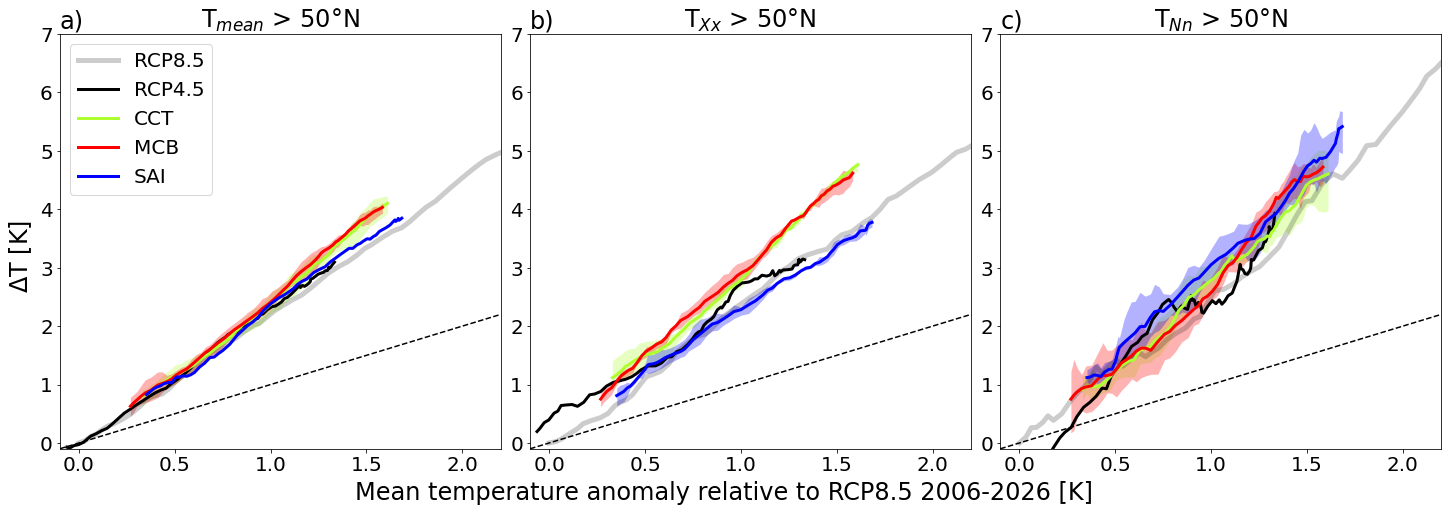

In [11]:
matplotlib.rcParams.update({'font.size': 20})
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  sharex = True, figsize = (20,7), constrained_layout = True) # sharey = True,
plt.ylim = (-0.1, 7)
fig.supxlabel('Mean temperature anomaly relative to RCP8.5 2006-2026 [K]')
fig.supylabel(r'$\Delta$T [K]') # 'Temperature change relative to RCP8.5 2006-2026 (°C)'

ax1.plot(RCP_Ref_Anomaly, RCP_Tmean_Anomaly, color = "black", label = "RCP8.5", linewidth=5.0, alpha = 0.2)
ax1.plot(RCP45_Ref_Anomaly, RCP45_Tmean_Anomaly, color = "black", label = "RCP4.5", linewidth=3.0)
ax1.plot([-0.1,2.2], [-0.1,2.2], "g--", color = "black")

ax1.fill_between(CCT_Ref_Anomaly, CCT_Tmean_max, CCT_Tmean_min, color = "greenyellow", alpha = 0.3, lw=0)
ax1.fill_between(MSB_Ref_Anomaly, MSB_Tmean_max, MSB_Tmean_min, color = "red", alpha = 0.3, lw=0)
ax1.fill_between(SAI_Ref_Anomaly, SAI_Tmean_max, SAI_Tmean_min, color = "blue", alpha = 0.3, lw=0)

ax1.plot(CCT_Ref_Anomaly, CCT_Tmean_Anomaly, color = "greenyellow", label = "CCT", linewidth=3.0)
ax1.plot(MSB_Ref_Anomaly, MSB_Tmean_Anomaly, color = "red", label = "MCB", linewidth=3.0)
ax1.plot(SAI_Ref_Anomaly, SAI_Tmean_Anomaly, color = "blue", label = "SAI", linewidth=3.0)

ax1.set_ylim(-0.1,7)
ax1.set_xlim(-0.1,2.2)
ax1.set_title("T$_{mean}$ > 50°N")
ax1.set_title('a)', loc='left')
ax1.legend(loc = "upper left")

ax2.plot(RCP_Ref_Anomaly, RCP_TXx_Anomaly, color = "black", label = "RCP8.5", linewidth=5.0, alpha = 0.2)
ax2.plot(RCP45_Ref_Anomaly, RCP45_TXx_Anomaly, color = "black", label = "RCP8.5", linewidth=3.0)
ax2.plot([-0.1,2.2], [-0.1,2.2], "g--", color = "black")

ax2.fill_between(CCT_Ref_Anomaly, CCT_TXx_max, CCT_TXx_min, color = "greenyellow", alpha = 0.3, lw=0)
ax2.fill_between(MSB_Ref_Anomaly, MSB_TXx_max, MSB_TXx_min, color = "red", alpha = 0.3, lw=0)
ax2.fill_between(SAI_Ref_Anomaly, SAI_TXx_max, SAI_TXx_min, color = "blue", alpha = 0.3, lw=0)

ax2.plot(CCT_Ref_Anomaly, CCT_TXx_Anomaly, color = "greenyellow", label = "CCT", linewidth=3.0)
ax2.plot(MSB_Ref_Anomaly, MSB_TXx_Anomaly, color = "red", label = "MCB", linewidth=3.0)
ax2.plot(SAI_Ref_Anomaly, SAI_TXx_Anomaly, color = "blue", label = "SAI", linewidth=3.0)

ax2.set_ylim(-0.1,7)
ax2.set_xlim(-0.1,2.2)
ax2.set_title("T$_{Xx}$ > 50°N")
ax2.set_title('b)', loc='left')

ax3.plot(RCP_Ref_Anomaly, RCP_TNn_Anomaly, color = "black", label = "RCP8.5", linewidth=5.0, alpha = 0.2)
ax3.plot(RCP45_Ref_Anomaly, RCP45_TNn_Anomaly, color = "black", label = "RCP8.5", linewidth=3.0)
ax3.plot([-0.1,2.2], [-0.1,2.2], "g--", color = "black")

ax3.fill_between(CCT_Ref_Anomaly, CCT_TNn_max, CCT_TNn_min, color = "greenyellow", alpha = 0.3, lw=0)
ax3.fill_between(MSB_Ref_Anomaly, MSB_TNn_max, MSB_TNn_min, color = "red", alpha = 0.3, lw=0)
ax3.fill_between(SAI_Ref_Anomaly, SAI_TNn_max, SAI_TNn_min, color = "blue", alpha = 0.3, lw=0)

ax3.plot(CCT_Ref_Anomaly, CCT_TNn_Anomaly, color = "greenyellow", label = "CCT", linewidth=3.0)
ax3.plot(MSB_Ref_Anomaly, MSB_TNn_Anomaly, color = "red", label = "MCB", linewidth=3.0)
ax3.plot(SAI_Ref_Anomaly, SAI_TNn_Anomaly, color = "blue", label = "SAI", linewidth=3.0)

ax3.set_ylim(-0.1,7)
ax3.set_xlim(-0.1,2.2)
ax3.set_title("T$_{Nn}$ > 50°N")
ax3.set_title('c)', loc='left')

plt.savefig(r"C:\Users\rhonda\OneDrive\Dokumente\Uni-DESKTOP-8400FCB\Master Thesis\Figures for Paper\Figure_1.jpg",bbox_inches='tight')


Store data as csv.

In [12]:
import pandas as pd
d = dict(RCP_Ref_Anomaly= RCP_Ref_Anomaly, RCP_Tmean_Anomaly= RCP_Tmean_Anomaly, RCP45_Ref_Anomaly = RCP45_Ref_Anomaly, RCP45_Tmean_Anomaly = RCP45_Tmean_Anomaly, CCT_Ref_Anomaly= CCT_Ref_Anomaly, CCT_Tmean_max= CCT_Tmean_max, CCT_Tmean_min= CCT_Tmean_min, MSB_Ref_Anomaly= MSB_Ref_Anomaly, MSB_Tmean_max= MSB_Tmean_max, MSB_Tmean_min= MSB_Tmean_min, SAI_Ref_Anomaly= SAI_Ref_Anomaly, SAI_Tmean_max= SAI_Tmean_max, SAI_Tmean_min= SAI_Tmean_min, CCT_Tmean_Anomaly= CCT_Tmean_Anomaly, MSB_Tmean_Anomaly= MSB_Tmean_Anomaly, SAI_Tmean_Anomaly= SAI_Tmean_Anomaly, RCP_TXx_Anomaly = RCP_TXx_Anomaly, RCP45_TXx_Anomaly = RCP45_TXx_Anomaly, CCT_TXx_max= CCT_TXx_max, CCT_TXx_min= CCT_TXx_min, MSB_TXx_max= MSB_TXx_max, MSB_TXx_min= MSB_TXx_min, SAI_TXx_max= SAI_TXx_max, SAI_TXx_min= SAI_TXx_min, CCT_TXx_Anomaly= CCT_TXx_Anomaly, MSB_TXx_Anomaly= MSB_TXx_Anomaly, SAI_TXx_Anomaly= SAI_TXx_Anomaly, CCT_TNn_max= CCT_TNn_max, CCT_TNn_min= CCT_TNn_min, MSB_TNn_max= MSB_TNn_max, MSB_TNn_min= MSB_TNn_min, SAI_TNn_max= SAI_TNn_max, SAI_TNn_min= SAI_TNn_min, RCP_TNn_Anomaly = RCP_TNn_Anomaly, RCP45_TNn_Anomaly = RCP45_TNn_Anomaly, CCT_TNn_Anomaly= CCT_TNn_Anomaly, MSB_TNn_Anomaly= MSB_TNn_Anomaly, SAI_TNn_Anomaly= SAI_TNn_Anomaly)
df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))
# df.to_excel(r'C:\Users\rhonda\OneDrive\Dokumente\Uni-DESKTOP-8400FCB\Master Thesis\Excel_Files\ED_Fig_3.xlsx', index = False)




from openpyxl import load_workbook

path = r"C:\Users\rhonda\OneDrive\Dokumente\Uni-DESKTOP-8400FCB\Master Thesis\Excel_Files\Source_data.xlsx"

book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl')
writer.book = book


df.to_excel(writer, sheet_name = 'Figure_1')
writer.close()